In [ ]:
## Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguins = pd.read_csv(url)

In [ ]:
# Display the first few rows of the dataset
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [ ]:
# Display the size of the dataset
print(penguins.shape)

(344, 8)


In [ ]:
# Displaying the types of data inside the dataset
print(penguins.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None


In [ ]:
# Data Cleaning
# Checking for missing values
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [ ]:
df = penguins.copy()

In [ ]:
# Handling out the numerical missing values with mean

columns_mean = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for column in columns_mean:
    df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
print(df.isnull().sum())

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64


In [ ]:
# Deleating the missing values from the 'sex' column

df_cleaned = df.dropna(subset=['sex'])

In [ ]:
print(df_cleaned.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


In [ ]:
# Changing a format of 'year' column to a date-time format

import numpy as np

In [ ]:
df_cleaned.loc[:, 'year'] = pd.to_datetime(df_cleaned['year'], format='%Y')

In [ ]:
print(df_cleaned.dtypes)

species                      object
island                       object
bill_length_mm              float64
bill_depth_mm               float64
flipper_length_mm           float64
body_mass_g                 float64
sex                          object
year                 datetime64[ns]
dtype: object


## Exploratory Data Analysis (EDA)

In [ ]:
# Summary statistics
print(df_cleaned.describe(include='all'))

       species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   
std        NaN     NaN        5.468668       1.969235          14.015765   

        body_mass_g   sex                           year  
count    333.000000   333   

In [19]:
# Unique values
print(df_cleaned.nunique())

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
year                   3
dtype: int64


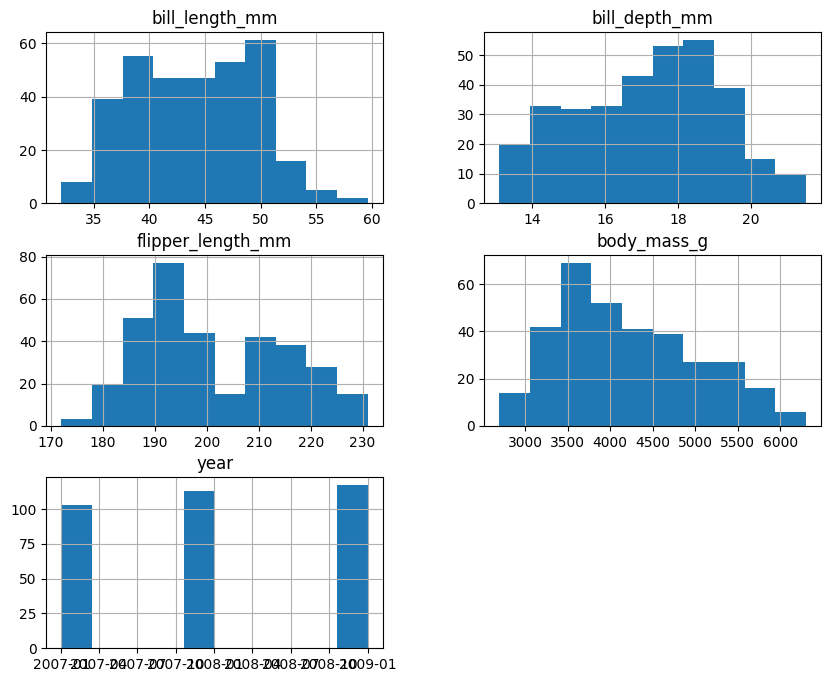

In [20]:
# Distribution of numerical columns
df_cleaned.hist(figsize=(10, 8))
plt.show()

## Visualization Tasks

<ipython-input-22-8edfe440f233>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df_cleaned, palette='Set2')


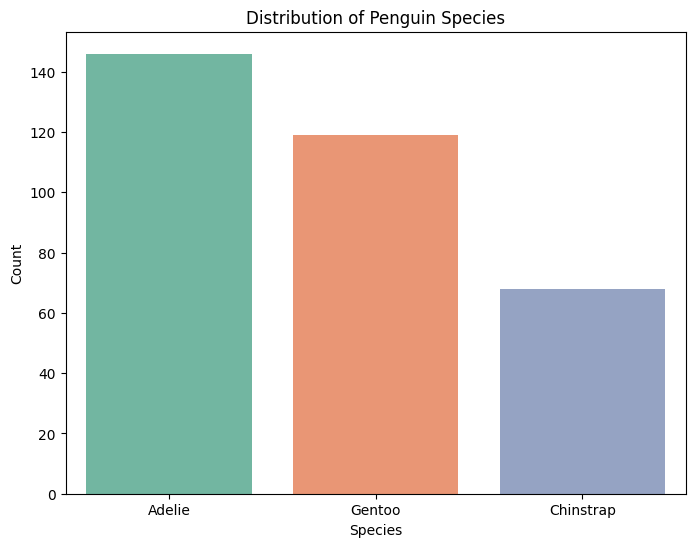

In [22]:
# Species Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df_cleaned, palette='Set2')
plt.title('Distribution of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

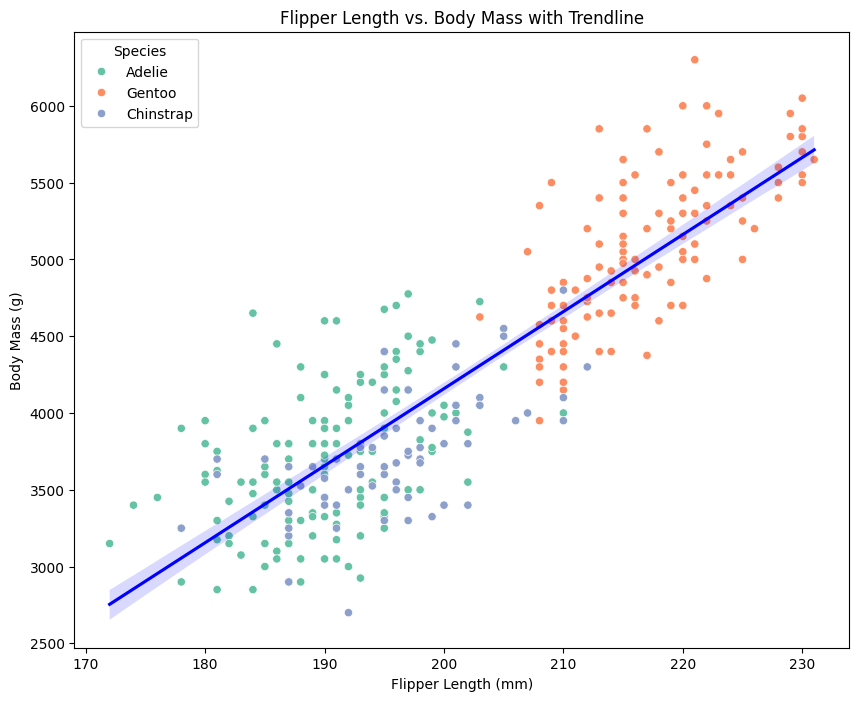

In [24]:
# Flipper Length vs. Body Mass
plt.figure(figsize=(10, 8))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=df_cleaned, palette='Set2')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=df_cleaned, scatter=False, color='blue')
plt.title('Flipper Length vs. Body Mass with Trendline')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend(title='Species')
plt.show()

We can notice a positive correlation between flipper length and bodymass

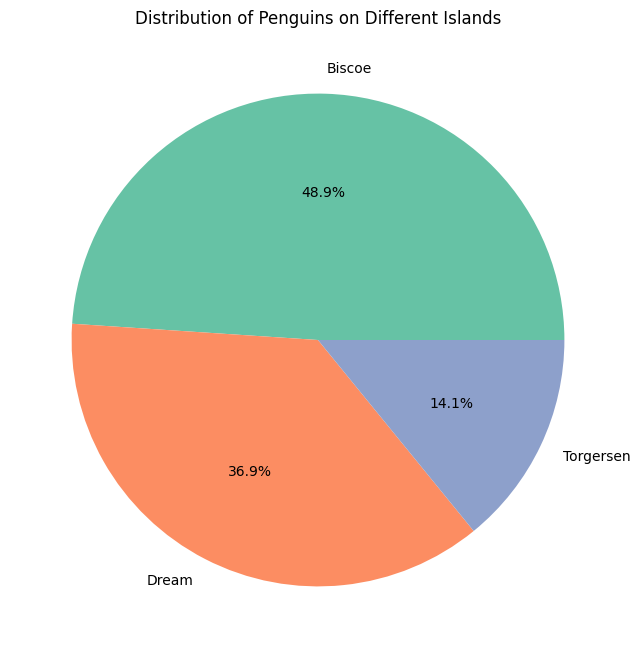

In [25]:
# Island Distribution
plt.figure(figsize=(8, 8))
df_cleaned['island'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Penguins on Different Islands')
plt.ylabel('')
plt.show()

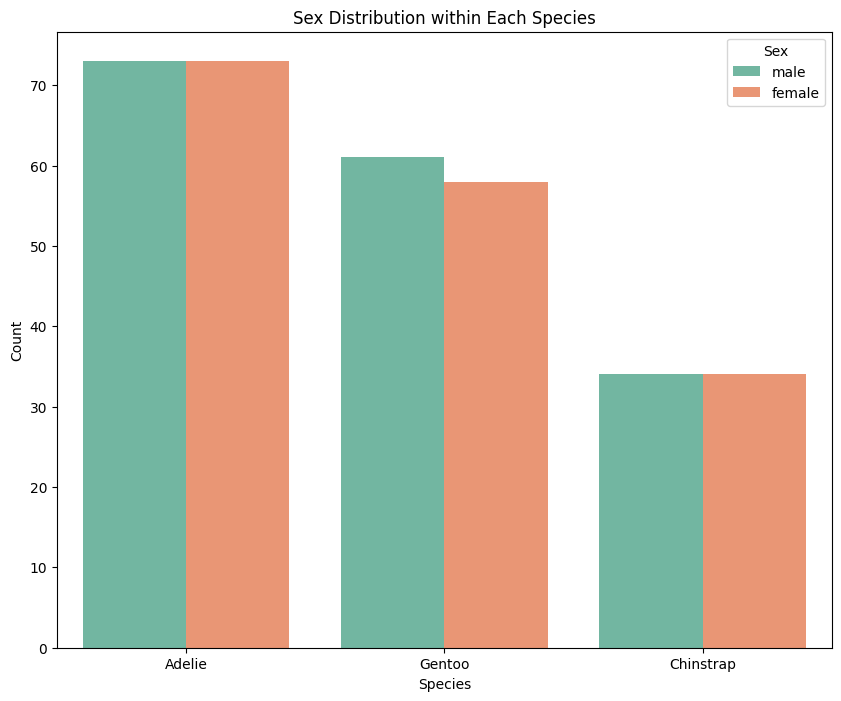

In [26]:
# Sex Distribution within Species
plt.figure(figsize=(10, 8))
sns.countplot(x='species', hue='sex', data=df_cleaned, palette='Set2')
plt.title('Sex Distribution within Each Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

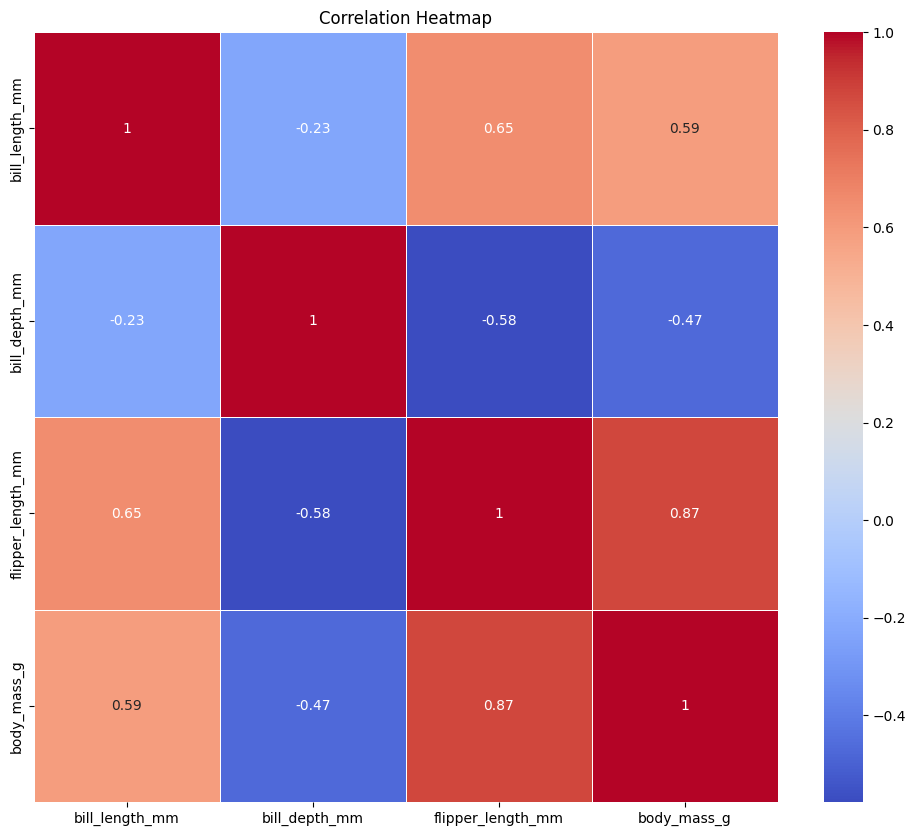

In [28]:
# Heatmap of Correlations
plt.figure(figsize=(12, 10))
numeric_df = df_cleaned.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

We can notice correlations between flipper length and body mass, and between bill length and bill depth.

<ipython-input-29-040341668614>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='flipper_length_mm', data=df_cleaned, palette='Set2', ax=axes[0, 0])
<ipython-input-29-040341668614>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='body_mass_g', data=df_cleaned, palette='Set2', ax=axes[0, 1])
<ipython-input-29-040341668614>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='bill_length_mm', data=df_cleaned, palette='Set2', ax=axes[1, 0])
<ipython-input-29-040341668614>:13: FutureWarning: 

Passing

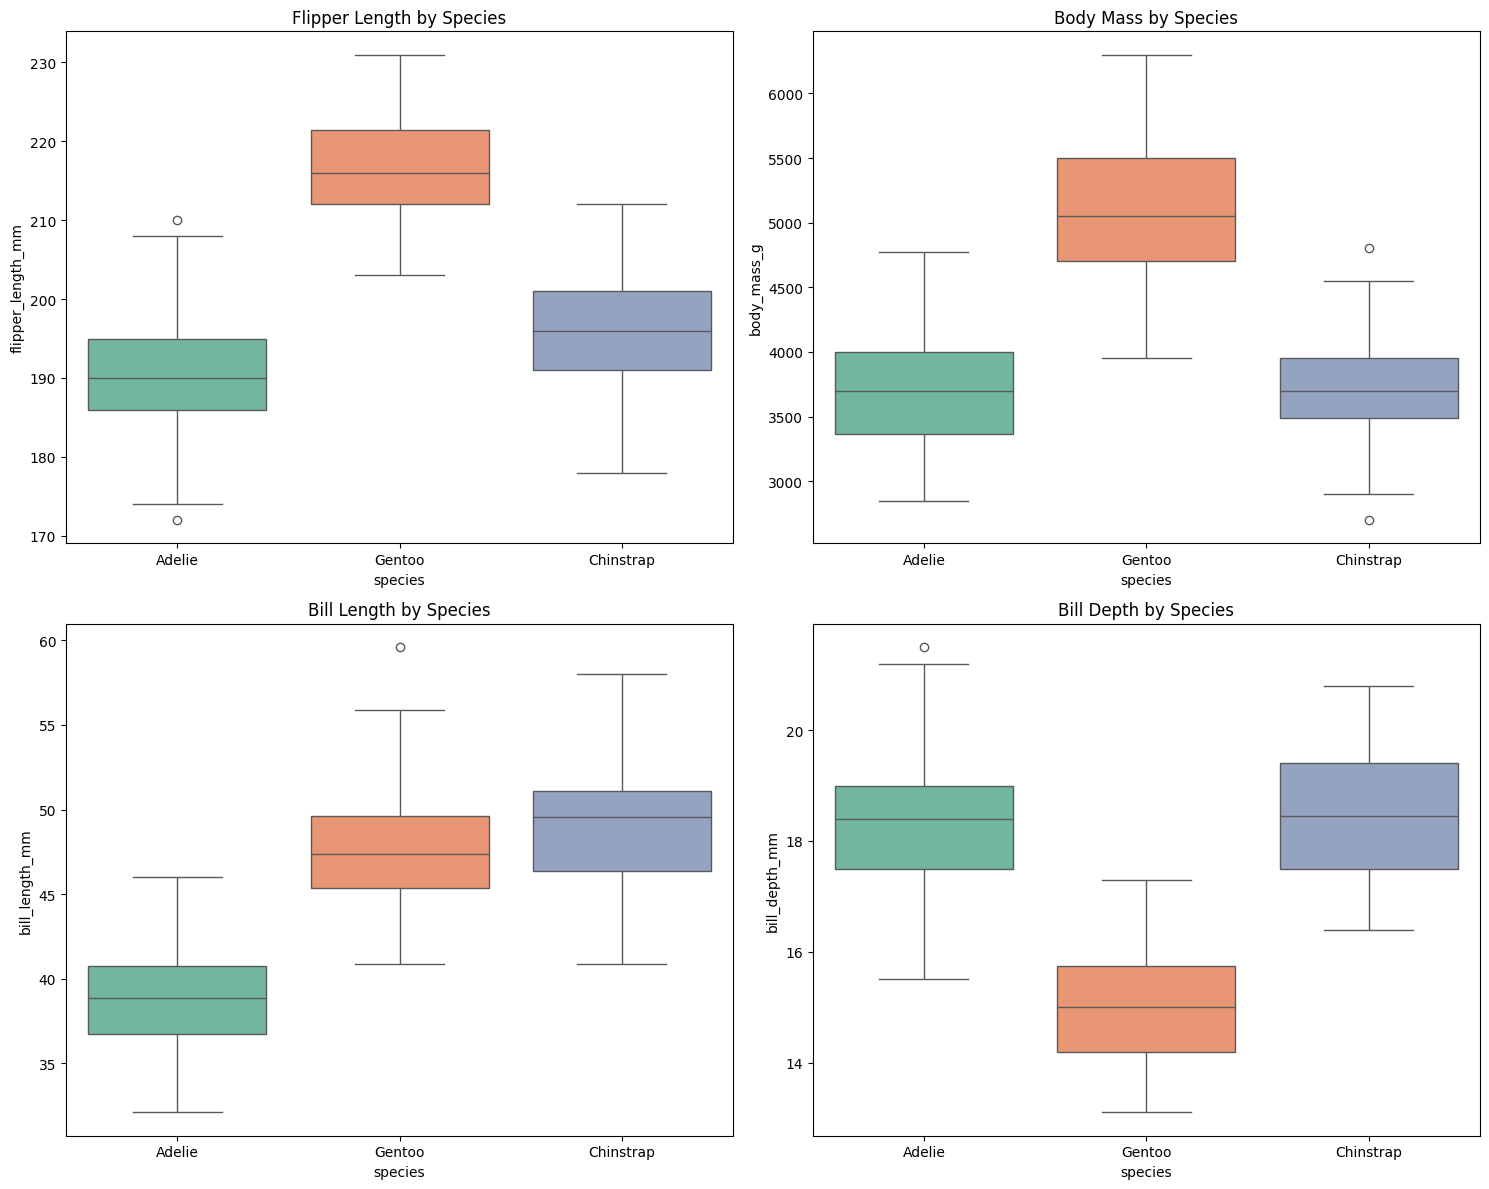

In [29]:
# Boxplots for Measurements
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(x='species', y='flipper_length_mm', data=df_cleaned, palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Flipper Length by Species')

sns.boxplot(x='species', y='body_mass_g', data=df_cleaned, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Body Mass by Species')

sns.boxplot(x='species', y='bill_length_mm', data=df_cleaned, palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Bill Length by Species')

sns.boxplot(x='species', y='bill_depth_mm', data=df_cleaned, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Bill Depth by Species')

plt.tight_layout()
plt.show()

We can notice, that Gentoo are leaders in flipper length and body mass and are bigger, than Adelie and Chinstap species. But Chinstrap penguins are leaders in bill length and bill depth and have the most distributed variations of that parameters.

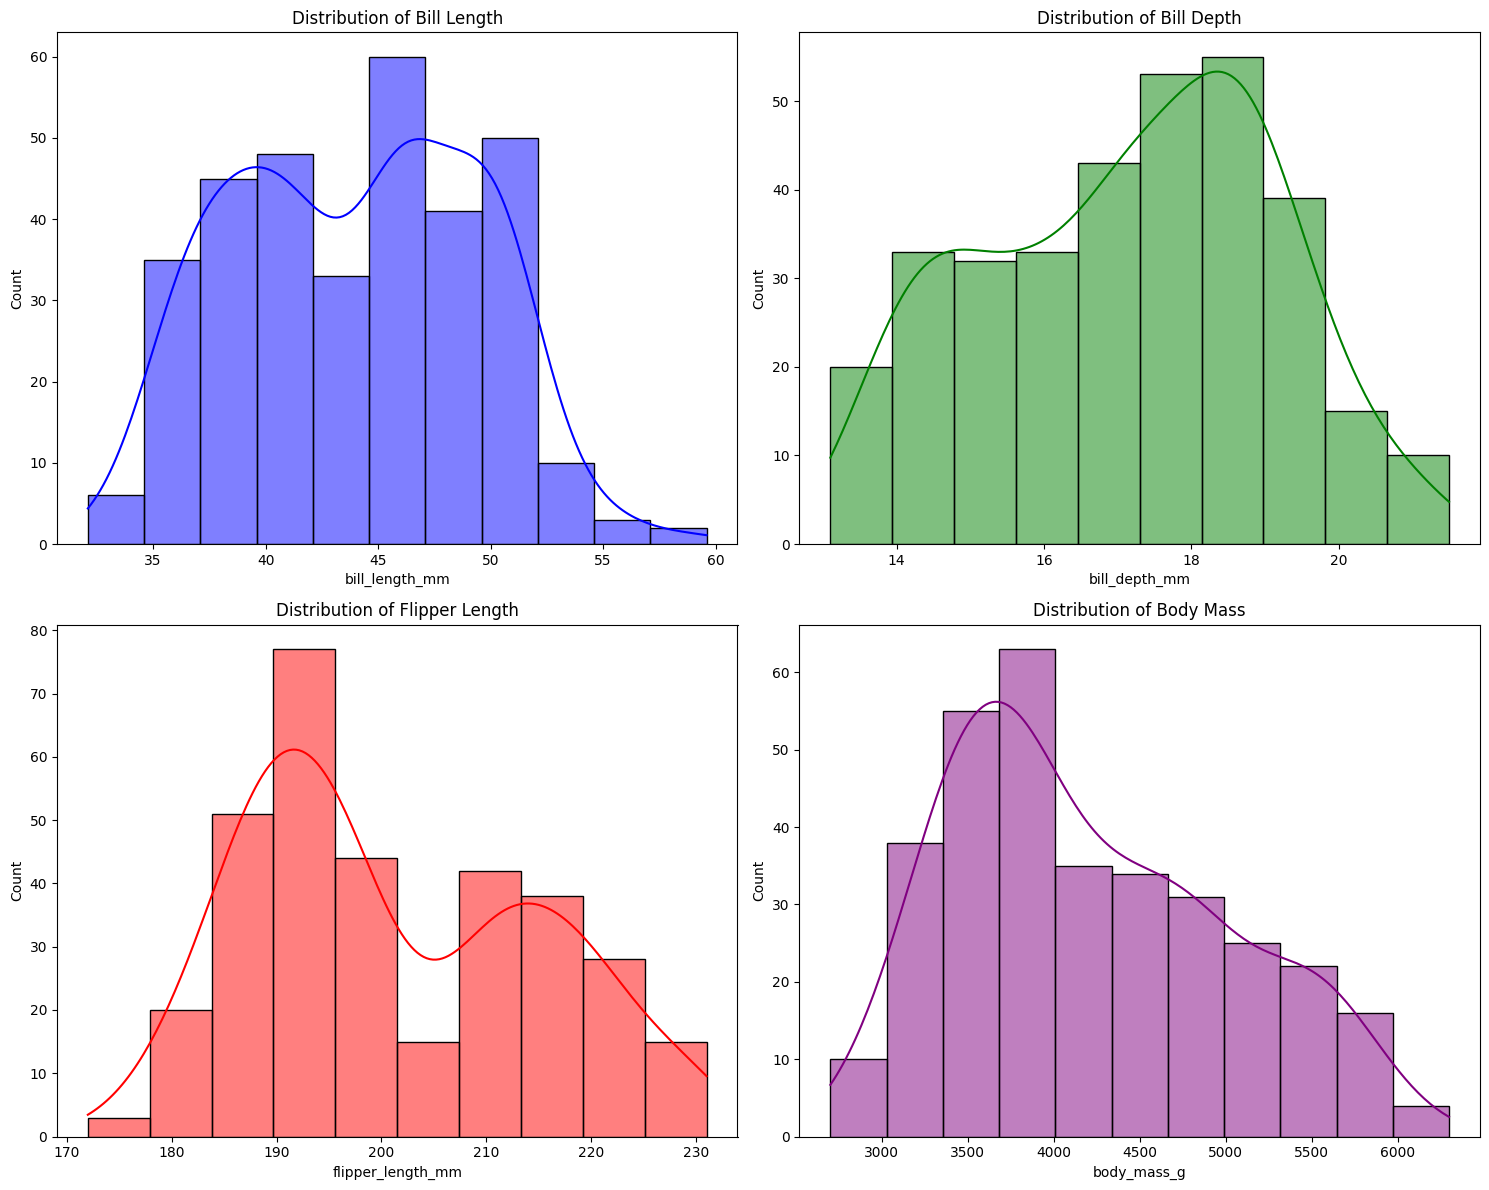

In [30]:
# Histograms of Measurements
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.histplot(df_cleaned['bill_length_mm'], kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Bill Length')

sns.histplot(df_cleaned['bill_depth_mm'], kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Bill Depth')

sns.histplot(df_cleaned['flipper_length_mm'], kde=True, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Flipper Length')

sns.histplot(df_cleaned['body_mass_g'], kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Body Mass')

plt.tight_layout()
plt.show()

The bill length values are quite equally distributed with a 2 peaks in the middle. Bill depth is more right scewed, and flipper length and body mass - more left scewed.

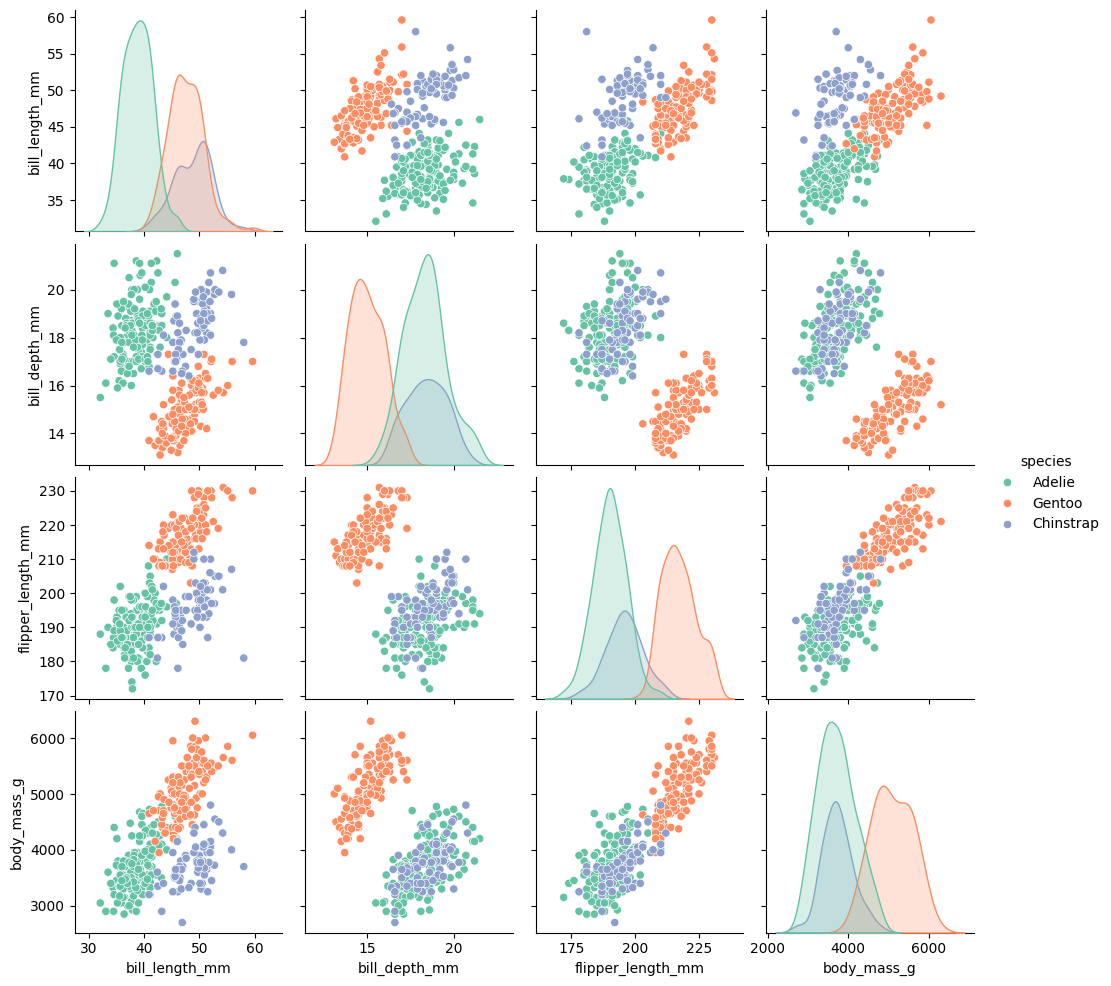

In [31]:
# Pairplot
sns.pairplot(df_cleaned, hue='species', palette='Set2')
plt.show()

## Conclusion

- The species distribution shows that Adelie penguins are the most common in the dataset.
- Flipper length and body mass have a positive correlation, with different species showing distinct clusters.
- Most penguins are found on Biscoe island, followed by Dream and Torgersen.
- The sex distribution within species indicates a balanced representation with some variations.
- Correlation heatmap reveals strong positive correlations between flipper length and body mass, and between bill length and bill depth.
- Boxplots show clear differences in measurements across species, particularly in flipper length and body mass.
- Histograms reveal the distribution of key measurements, with bill length and depth showing normal distributions, while flipper length and body mass show more variation.
- Pairplot visualizes pairwise relationships, highlighting the clustering of different species based on multiple measurements.